### **Libraries**


In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Statsmodel
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

%matplotlib inline
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Consider the Boston Housing Price Dataset.**


In [ ]:
from sklearn.datasets import load_boston

boston_data = load_boston()
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
df = pd.DataFrame(boston_data.data)
df.columns = boston_data.feature_names
# Target Variable
df["MEDV"] = boston_data.target

In [ ]:
pd.set_option('display.max_column', df.shape[1])

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.shape

(506, 14)

In [ ]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### **Find the correlation of features using a heatmap.**


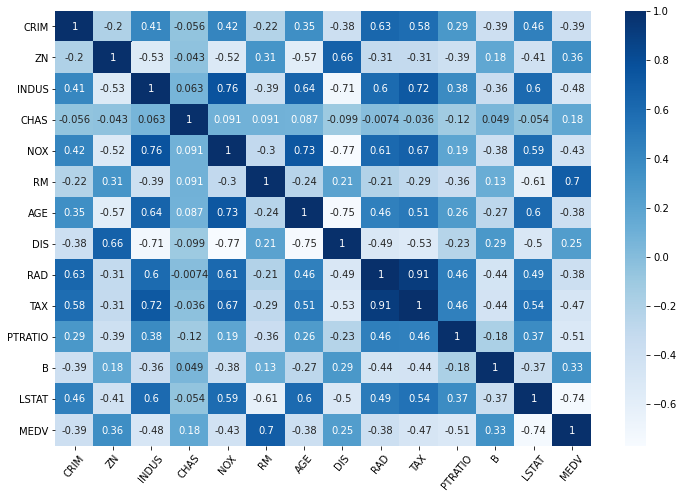

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
    df.corr(),
    cmap="Blues",
    xticklabels=df.corr().columns.values,
    yticklabels=df.corr().columns.values,
    annot=True,
    ax=ax
)
ax.set_xticklabels(df.columns, rotation=50)
plt.show()

### **Perform hypothesis testing**


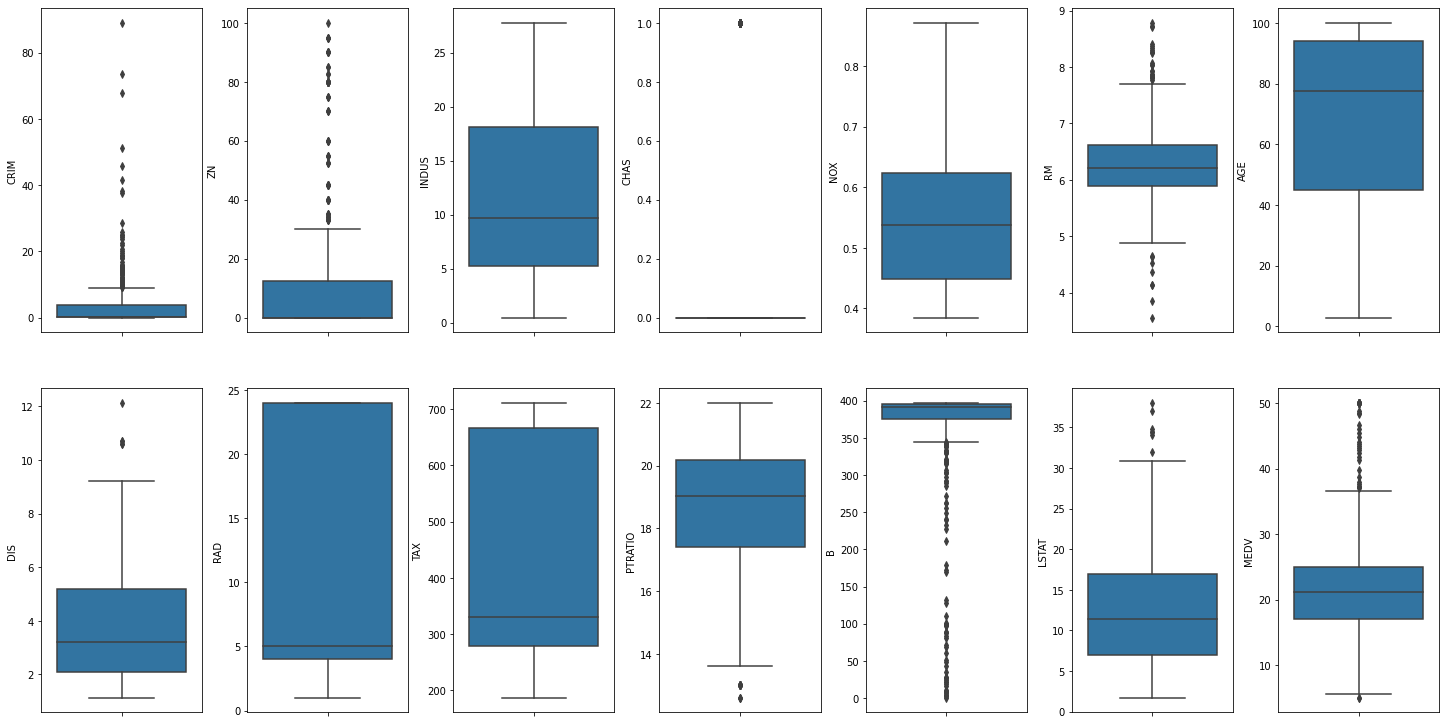

In [ ]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()
for key, val in df.items():
    sns.boxplot(y=key, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

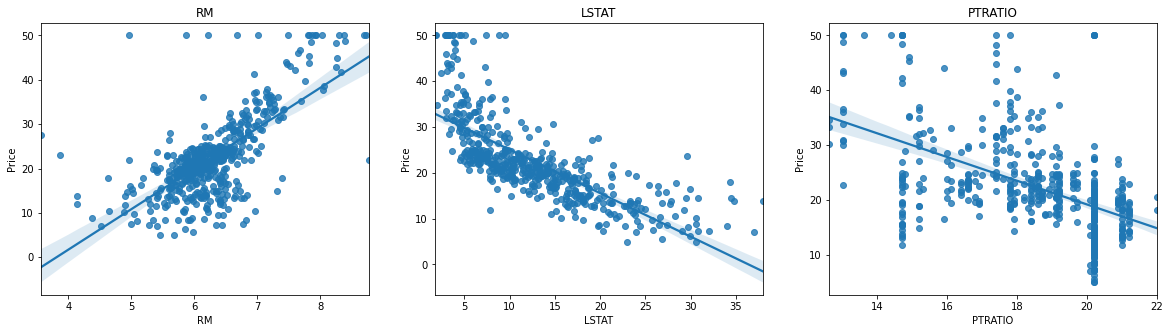

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20, 5))
for indx, feature in enumerate(["RM", "LSTAT", "PTRATIO"]):
  sns.regplot(df[feature], df["MEDV"], ax=ax[indx])
  ax[indx].set_title(feature)
  ax[indx].set_xlabel(feature)
  ax[indx].set_ylabel("Price")

**RM**

- For a higher RM, MEDV would simultaneously increase as more rooms means more space hence more cost.

**LSTAT**
- For a higher LSTAT, one would expect to observe a a lower MEDV, as people would prefer a better neighborhood in most cases.

**PTRATIO**
- For a higher LSTAT, one would expect to observe a lower MEDV. More pupil and less teacher's would necessarily point to lack of infra for better education, leading to number of families with children not preferring the area.

### **Linear Regression using statsmodel**


In [ ]:
model = ols("MEDV ~ PTRATIO + RM + LSTAT ", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          2.69e-123
Time:                        18:15:29   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.5671      3.913      4.745      0.0

- Looking at (p > |t|) all values are 0, hence concludes all the features would help in predicting the price

In [ ]:
pred_prices = model.fittedvalues

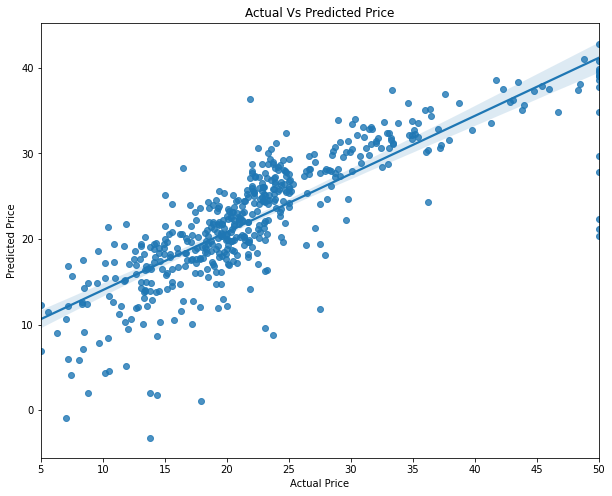

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(df['MEDV'], pred_prices, ax=ax)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.set_title("Actual Vs Predicted Price")
plt.show()

### **Using scikit-learn, verify atleast 2 assumptions in Linear Regression.**

In [ ]:
X = df.drop("MEDV", axis=1)
Y = df["MEDV"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(379, 13)
(127, 13)
(379,)
(127,)


#### ***Linear Regression Model***

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
Y_pred = lin_reg.predict(X_test)

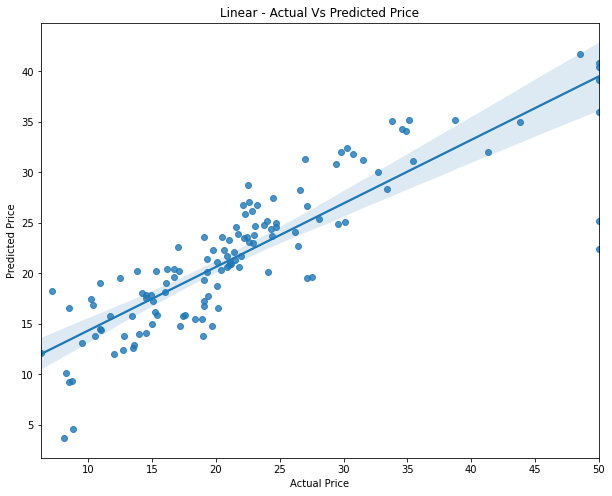

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(Y_test, Y_pred, ax=ax)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.set_title("Linear - Actual Vs Predicted Price")
plt.show()

In [ ]:
print("Coefficients: \n", lin_reg.coef_)

Coefficients: 
 [-7.91941832e-02  4.57346937e-02 -1.91618498e-02  2.42425004e+00
 -1.37566386e+01  3.85295127e+00 -1.32030023e-02 -1.48241647e+00
  2.96989765e-01 -1.31667310e-02 -9.20210891e-01  1.08903562e-02
 -4.52953748e-01]


In [ ]:
print(f"Train: {lin_reg.score(X_train, Y_train)}")
print(f"Test: {lin_reg.score(X_test, Y_test)}")

Train: 0.7421573768304615
Test: 0.7246154314616742


In [ ]:
mse = mean_squared_error(Y_test, Y_pred)
print(f"MSE: {mse}")

MSE: 27.173144173043568


In [ ]:
print(f"MAE: {mean_absolute_error(Y_test, Y_pred)}")
print(f"RMSE: {np.sqrt(mse)}")

MAE: 3.388403871408012
RMSE: 5.21278660344384


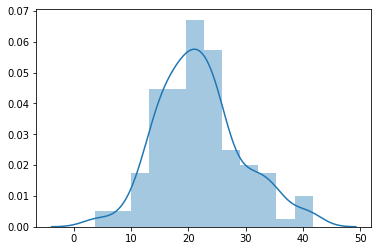

In [ ]:
sns.distplot(Y_pred);

### **Also, use Lasso and Ridge Regression and compare the 3 regressions. The better way for comparison is by plotting graphs of three.**



#### ***Ridge Regression***

In [ ]:
rid_reg = Ridge()
rid_reg.fit(X_train, Y_train)
Y_pred_rid = rid_reg.predict(X_test)

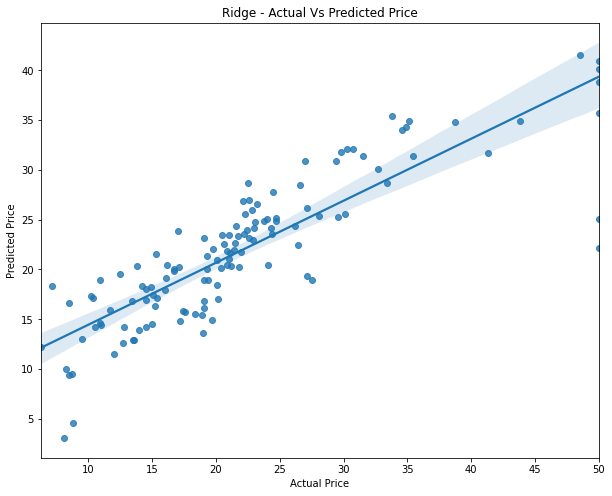

In [ ]:
fig,ax = plt.subplots(figsize=(10, 8))
sns.regplot(Y_test, Y_pred_rid, ax=ax)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.set_title("Ridge - Actual Vs Predicted Price")
plt.show()

In [ ]:
print("Ridge Coefficients: \n", rid_reg.coef_)

Ridge Coefficients: 
 [-0.07480393  0.04704281 -0.04361606  2.35462756 -7.29440668  3.86290329
 -0.01913853 -1.38990034  0.28246012 -0.01389528 -0.85480502  0.01121606
 -0.46070375]


In [ ]:
print(f"Train: {rid_reg.score(X_train, Y_train)}")
print(f"Test: {rid_reg.score(X_test, Y_test)}")

Train: 0.7405832723635288
Test: 0.7164676197009321


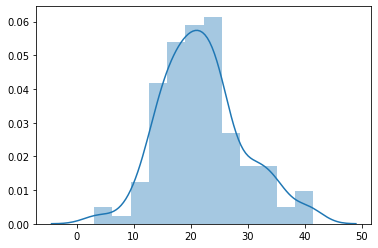

In [ ]:
sns.distplot(Y_pred_rid);

#### ***Lasso Regression***

In [ ]:
lass_reg = Lasso()
lass_reg.fit(X_train, Y_train)
Y_pred_lass = lass_reg.predict(X_test)

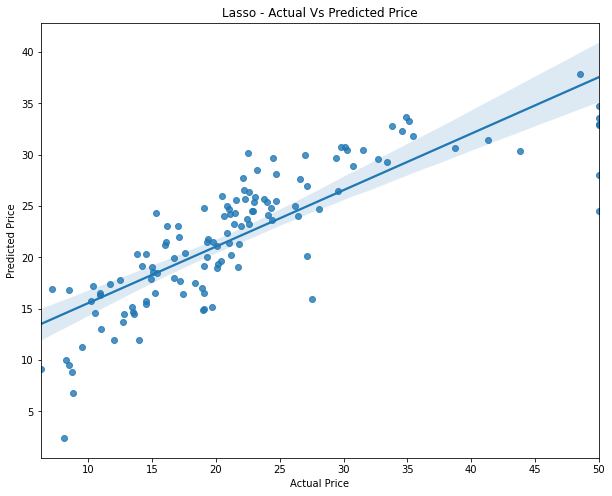

In [ ]:
fig,ax = plt.subplots(figsize=(10, 8))
sns.regplot(Y_test, Y_pred_lass, ax=ax)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.set_title("Lasso - Actual Vs Predicted Price")
plt.show()

In [ ]:
print("Lasso Coefficients: \n", lass_reg.coef_)

Lasso Coefficients: 
 [-0.03335999  0.05178784 -0.          0.         -0.          0.88414558
  0.01336917 -0.65899119  0.28779251 -0.01745606 -0.71508259  0.00869147
 -0.70076563]


In [ ]:
print(f"Train: {lass_reg.score(X_train, Y_train)}")
print(f"Test: {lass_reg.score(X_test, Y_test)}")

Train: 0.6838485940749089
Test: 0.6577184083896714


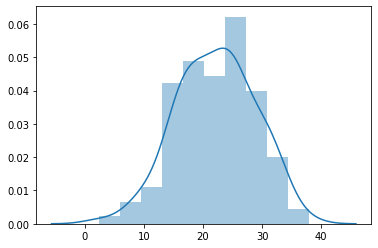

In [ ]:
sns.distplot(Y_pred_lass);

#### ***Distribution Plots***

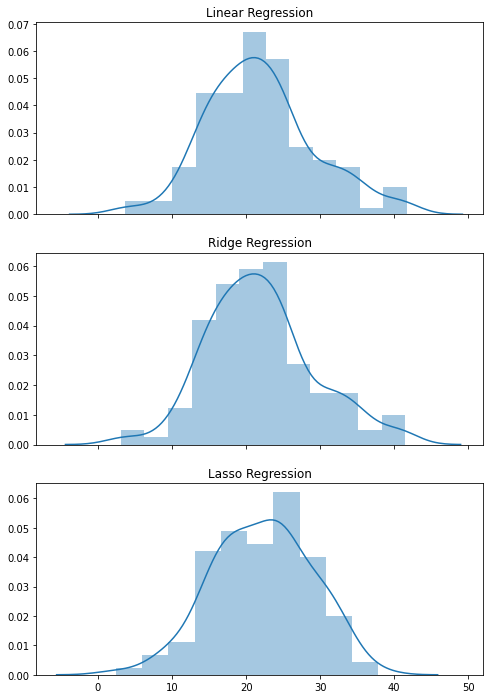

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(8, 12), sharex=True)
sns.distplot(Y_pred, ax=ax[0])
ax[0].set_title("Linear Regression")
sns.distplot(Y_pred_rid, ax=ax[1])
ax[1].set_title("Ridge Regression")
sns.distplot(Y_pred_lass, ax=ax[2])
ax[2].set_title("Lasso Regression")
plt.show()